<양자역학:해밀토니안을 구해보자>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#x-axis range
start=-5
end=5
ep=0.05
num=((end-start)/ep)+1

#constants
hbar=1
m=1
w=1

#x=[0:a/(N-1):a]
x=torch.linspace(start, end, int(num))#x=[0:ep:a]
N=len(x)
print(x.size())

identity_matrix = torch.eye(N)  
off_diag = torch.ones(N-1) 

#운동량 연산자(x-bais)
K = (1/ep**2) * ((-hbar**2) / (2 * m)) * (-2 * identity_matrix + torch.diag(off_diag, 1) + torch.diag(off_diag, -1))
print(K.size())

#HO Potential(x-bais)
V_ho = (1/2)*m*w**2*torch.diag(x)**2
V_ho[0,0]=1e3
V_ho[N-1,N-1]=1e3
print(V_ho.size())
V_ho_flat = (1/2)*m*w**2*x**2

#Hamiltonian
H = K+V_ho

torch.Size([201])
torch.Size([201, 201])
torch.Size([201, 201])


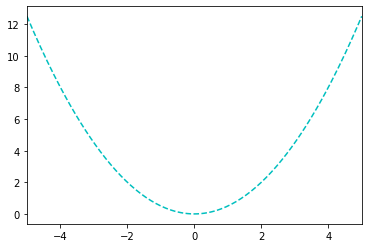

In [3]:
plt.figure()
plt.plot(x, V_ho_flat, 'c--')
plt.xlim(start,end)
#plt.ylim(-1,1)
plt.show()

In [4]:
#true value
def eigen(Ht):
    eigenvals , eigenvecs = torch.linalg.eigh(Ht)
    return eigenvals , eigenvecs

eigenvals_tr , eigenvecs_tr=eigen(H)



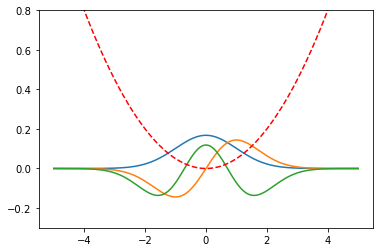

In [5]:
plt.figure()
for i in range(0,3):
    plt.plot(x, eigenvecs_tr[:,i])

plt.ylim(-0.3,0.8)
plt.plot(x, 1e-1*V_ho_flat, "r--")
plt.show()

#plt.yticks(np.arange(-0.4,0.5,0.1))


In [6]:
eigenvals_tr

tensor([4.9994e-01, 1.4996e+00, 2.4990e+00, 3.4981e+00, 4.4968e+00, 5.4953e+00,
        6.4939e+00, 7.4939e+00, 8.4995e+00, 9.5204e+00, 1.0574e+01, 1.1682e+01,
        1.2866e+01, 1.4140e+01, 1.5512e+01, 1.6984e+01, 1.8557e+01, 2.0229e+01,
        2.2000e+01, 2.3869e+01, 2.5834e+01, 2.7894e+01, 3.0049e+01, 3.2297e+01,
        3.4639e+01, 3.7072e+01, 3.9597e+01, 4.2212e+01, 4.4917e+01, 4.7711e+01,
        5.0593e+01, 5.3563e+01, 5.6620e+01, 5.9762e+01, 6.2989e+01, 6.6301e+01,
        6.9696e+01, 7.3174e+01, 7.6733e+01, 8.0373e+01, 8.4093e+01, 8.7892e+01,
        9.1769e+01, 9.5723e+01, 9.9753e+01, 1.0386e+02, 1.0804e+02, 1.1229e+02,
        1.1661e+02, 1.2101e+02, 1.2547e+02, 1.3001e+02, 1.3461e+02, 1.3927e+02,
        1.4401e+02, 1.4880e+02, 1.5366e+02, 1.5859e+02, 1.6357e+02, 1.6861e+02,
        1.7371e+02, 1.7886e+02, 1.8408e+02, 1.8934e+02, 1.9466e+02, 2.0003e+02,
        2.0545e+02, 2.1092e+02, 2.1644e+02, 2.2201e+02, 2.2762e+02, 2.3327e+02,
        2.3896e+02, 2.4470e+02, 2.5047e+

In [7]:
eigenvals_tr/eigenvals_tr[0]

tensor([1.0000e+00, 2.9996e+00, 4.9986e+00, 6.9969e+00, 8.9946e+00, 1.0992e+01,
        1.2989e+01, 1.4990e+01, 1.7001e+01, 1.9043e+01, 2.1150e+01, 2.3367e+01,
        2.5735e+01, 2.8284e+01, 3.1028e+01, 3.3973e+01, 3.7118e+01, 4.0463e+01,
        4.4006e+01, 4.7743e+01, 5.1673e+01, 5.5794e+01, 6.0104e+01, 6.4601e+01,
        6.9285e+01, 7.4152e+01, 7.9202e+01, 8.4433e+01, 8.9844e+01, 9.5432e+01,
        1.0120e+02, 1.0714e+02, 1.1325e+02, 1.1954e+02, 1.2599e+02, 1.3262e+02,
        1.3941e+02, 1.4636e+02, 1.5348e+02, 1.6076e+02, 1.6821e+02, 1.7580e+02,
        1.8356e+02, 1.9147e+02, 1.9953e+02, 2.0774e+02, 2.1610e+02, 2.2460e+02,
        2.3325e+02, 2.4204e+02, 2.5097e+02, 2.6004e+02, 2.6924e+02, 2.7858e+02,
        2.8805e+02, 2.9764e+02, 3.0736e+02, 3.1721e+02, 3.2717e+02, 3.3725e+02,
        3.4745e+02, 3.5777e+02, 3.6819e+02, 3.7873e+02, 3.8937e+02, 4.0011e+02,
        4.1095e+02, 4.2189e+02, 4.3293e+02, 4.4406e+02, 4.5528e+02, 4.6659e+02,
        4.7798e+02, 4.8945e+02, 5.0100e+

In [29]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.L1=nn.Linear(2,40)
        self.L2=nn.Linear(40,1)
        self.act= nn.ReLU() 

    def forward(self, x, eigenvalss):
        data = torch.cat((x.view(-1, 1), eigenvalss.view(-1, 1)), dim=1)
        layer = self.act(self.L1(data))
        output = self.L2(layer)
        return output.view(-1)


model=Model()
V_model=model(x,eigenvals_tr) #output
Vdiag_model=torch.diag(V_model) #diagonalized output


In [30]:
#epoch 돌리기

optimizer = torch.optim.Adam( model.parameters(),lr=0.1)


for j in range(1000):

    V_model=model(x,eigenvals_tr)
    Vdiag_model=torch.diag(V_model)
    H_model=K+Vdiag_model
    
    eigenvals_model, eigenvecs_model = eigen(H_model)

    loss = torch.mean(torch.abs(eigenvals_tr - eigenvals_model))
    print(f"Iteration {j}, Loss: {loss.item()}")

    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Iteration 0, Loss: 46.18892288208008
Iteration 1, Loss: 327.5355224609375
Iteration 2, Loss: 240.9149627685547
Iteration 3, Loss: 99.24169921875
Iteration 4, Loss: 37.99773025512695
Iteration 5, Loss: 72.60212707519531
Iteration 6, Loss: 66.12142181396484
Iteration 7, Loss: 44.53902816772461
Iteration 8, Loss: 17.367948532104492
Iteration 9, Loss: 22.320960998535156
Iteration 10, Loss: 33.222312927246094
Iteration 11, Loss: 34.067508697509766
Iteration 12, Loss: 29.58139419555664
Iteration 13, Loss: 23.310277938842773
Iteration 14, Loss: 17.729116439819336
Iteration 15, Loss: 14.157644271850586
Iteration 16, Loss: 13.43626880645752
Iteration 17, Loss: 13.330536842346191
Iteration 18, Loss: 13.17202091217041
Iteration 19, Loss: 12.91903018951416
Iteration 20, Loss: 12.461675643920898
Iteration 21, Loss: 11.66550350189209
Iteration 22, Loss: 10.381035804748535
Iteration 23, Loss: 8.792352676391602
Iteration 24, Loss: 8.185891151428223
Iteration 25, Loss: 9.502543449401855
Iteration 26, L

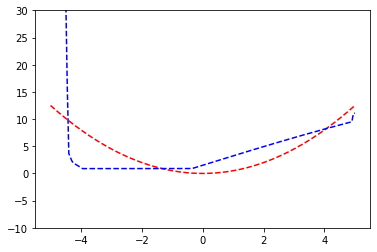

In [31]:
V_flat_model=torch.diag(Vdiag_model.detach())

plt.figure()
plt.plot(x, V_ho_flat, 'c--', color='r')
plt.plot(x, V_flat_model, 'c--', color='b')
#plt.xlim(-1,6)
plt.ylim(-10,30)
plt.show()
